In [3]:
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from fractions import Fraction
from numpy.random import choice
import warnings 
warnings.filterwarnings("ignore", category=RuntimeWarning) 
#some Runtime Warnings occur when graph is set to true


100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 15947.92it/s]

3 * 5   = 15 , r = 4  , a = 2  , nbits = 4 


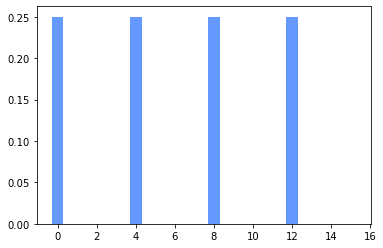

In [32]:
delta = lambda x,y: int(x==y)
shorbox = lambda a,x,nbits,N: (abs(fft([delta(x, a**k % N) for k in range(2**nbits)]))/(2**nbits))**2

# Chooses smallest nbits > log2(N) so code is fast as possible
# Picks some a coprime with N
# Takes the Fourier transform of the periodic equation a^k mod N = x with respect to k, and sums all these for every a.
# Measures the location of one of the spikes of the probability graph about 1000 times 
# And uses fractions.Fraction to guess r
# If r is odd the code is thrown out and we start again for a new a.
# If we have the correct r, p1 = gcd(a^(r/2) - 1,N), p2 = gcd(a^(r/2) + 1,N)


def Factorise(N,tests = 8000,a = 2,nbits = 0,loop = True,graph = False,timer = False): #loop = False if we know it only works for a certain seed
    loop2 = True
    if nbits == 0:
        nbits = max(7,int(1+np.log2(N+4)))
    while a < N and loop2 == True:
        loop2 = loop
        while np.gcd(a,N) != 1:
            a += 1
        if timer:
            probabilities = [0]*2**nbits
            for i in tqdm(range(2**nbits)):
                probabilities += shorbox(a,i,nbits,N)#
        else: #the following line does the same as above but is less likely to give divide by zero errors
            probabilities = sum([shorbox(a,x,nbits,N) for x in range(2**nbits)]) #probabilites is a list length 2**nbits
        if graph:
            plt.bar(range(len(probabilities)),probabilities,width=.6,color=(0.4,0.6,1))
        checkedlist = []
        for i in range(tests):
            phase = choice(range(2**nbits),p=probabilities)/2**nbits
            r = Fraction(phase).limit_denominator(int(N/2)).denominator
            if r not in checkedlist:
                checkedlist.append(r)
                #print(r)
                if r > 1 and r % 2 == 0:
                    if int(a**(r/2)) <= 2**62: #gcd requires numbers below 2^64
                        p1 = np.gcd(int(a**(r/2)-1),N)
                        p2 = np.gcd(int(a**(r/2)+1),N)
                        plist = [p1,p2] if p1 <= p2 else [p2,p1]
                        if p1 * p2 == N and p1 != 1 and p2 != 1:                        
                            return f"{plist[0]:<2d}* {plist[1]:<3d} = {N:<3d}, r = {r:<3d}, a = {a:<3d}, nbits = {nbits:<2d}"
        a += 1
    return "I can't do "+str(N)


print(Factorise(15,nbits=4,a=2,graph=True,loop=False,timer = True))

In [33]:
def primes(N):
    primel = [2]
    endindex = 0
    for i in range(3,N+1,2):
        for j in primel[endindex:-1]:
            if j > np.sqrt(i):
                endindex = primel.index(j)
                break
        prime = True
        for k in primel[0:endindex]:
            if i%k == 0:
                prime = False
                break
        if prime:
            primel.append(i)
    return primel

def Semiprimes(N):
    semiprimel = []
    primelist = primes(N//2)[1:] #2 does not behave well with Shor's algorithm
    for i in enumerate(primelist):
        for j in primelist[i[0]:]:
            if j > i[1]: #square numbers also dont work since the algorithm finds 2 different factors
                if i[1]*j <= N:
                    semiprimel.append(i[1]*j)
    semiprimel.sort()
    return semiprimel


In [35]:
for N in Semiprimes(292):
    print(Factorise(N,100))

3 * 5   = 15 , r = 4  , a = 2  , nbits = 7 
3 * 7   = 21 , r = 6  , a = 2  , nbits = 7 
3 * 11  = 33 , r = 10 , a = 5  , nbits = 7 
5 * 7   = 35 , r = 12 , a = 2  , nbits = 7 
3 * 13  = 39 , r = 12 , a = 2  , nbits = 7 
3 * 17  = 51 , r = 8  , a = 2  , nbits = 7 
5 * 11  = 55 , r = 10 , a = 4  , nbits = 7 
3 * 19  = 57 , r = 18 , a = 5  , nbits = 7 
5 * 13  = 65 , r = 6  , a = 9  , nbits = 7 
3 * 23  = 69 , r = 22 , a = 2  , nbits = 7 
7 * 11  = 77 , r = 30 , a = 2  , nbits = 7 
5 * 17  = 85 , r = 8  , a = 2  , nbits = 7 
3 * 29  = 87 , r = 4  , a = 17 , nbits = 7 
7 * 13  = 91 , r = 30 , a = 3  , nbits = 7 
3 * 31  = 93 , r = 2  , a = 32 , nbits = 7 
5 * 19  = 95 , r = 4  , a = 18 , nbits = 7 
3 * 37  = 111, r = 4  , a = 31 , nbits = 7 
5 * 23  = 115, r = 4  , a = 22 , nbits = 7 
7 * 17  = 119, r = 16 , a = 6  , nbits = 7 
3 * 41  = 123, r = 8  , a = 14 , nbits = 7 
3 * 43  = 129, r = 6  , a = 7  , nbits = 8 
7 * 19  = 133, r = 2  , a = 20 , nbits = 8 
3 * 47  = 141, r = 46 , a = 2  ,